# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

Accuracy:  0.6666666666666666
Precision:  1.0
Recall:  0.5
F1 Score:  0.6666666666666666
Confusion Matrix
[[1 0]
 [1 1]]


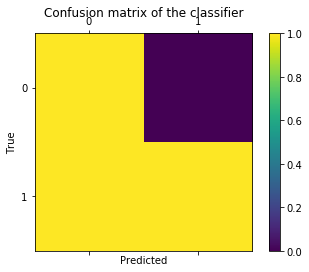

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt # this is used for the plot the graph 



yraw = [0, 1 , 1]
ypred = [0 , 1,  0]
x1 = [0,1,0]
x2 = [0, 1, 1]
print("Accuracy: ", accuracy_score(yraw, ypred))
print("Precision: ", precision_score(yraw, ypred))
print("Recall: ", recall_score(yraw, ypred))
print("F1 Score: ", f1_score(yraw, ypred))


print("Confusion Matrix")

labels = ['business', 'health']
cm = confusion_matrix(yraw, ypred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [11]:
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(yraw, score[:,1], pos_label =1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color ='blue', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()



NameError: name 'metrics' is not defined

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold

import seaborn as sns



from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
path = os.getcwd()
print(path)
os.listdir(".")

data = pd.read_csv("heartdisease.csv")


/Users/loranceluo/Document/UCLA CS 188/cs188 Project 2


### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [5]:
header = data.columns.values.tolist()
header.pop()
header

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [6]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,False
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,False
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,False
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,False
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,False


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
sick        303 non-null bool
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

I first use describe() to take a look at the data and use info() to check all the types of data to see whether 'object' type present. After that I use isnull().sum() to see total null count from each column. 

cp, sex, fbs, restecg, exang, thal, ca are implemented with number. Since they all should be categorical value, we have to one-hot-encode them to categorical value.

'sick' column has to be transform into int or float becasuse traning model only accept int or float as the input.


### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [10]:
data["sick"] = data["sick"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
sick        303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

Red - sick
Green- No sick


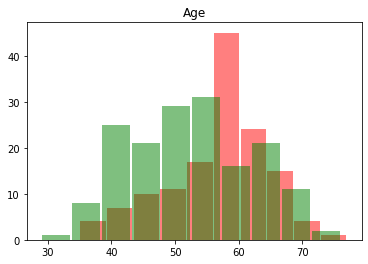

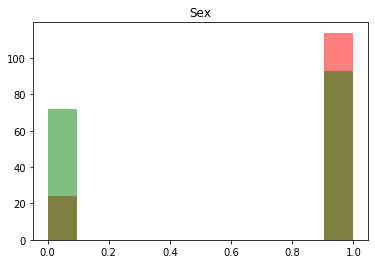

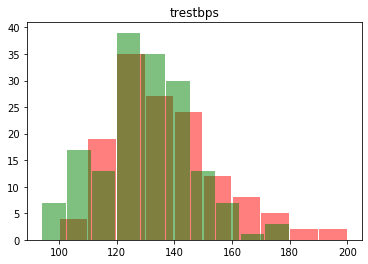

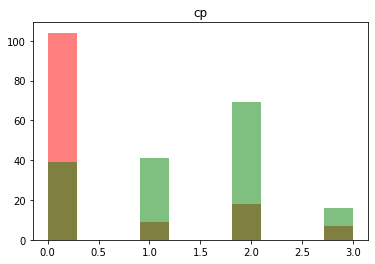

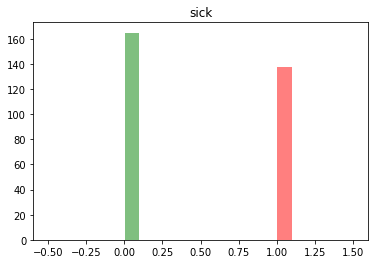

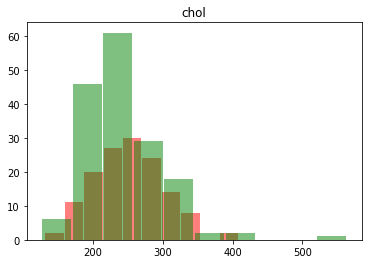

In [11]:
#data["age"].hist(figsize= (40,20), facecolor = 'r', alpha = 0.75)

#hist(df0[df0.num>0].age.tolist(),bins,color=["r"],histtype="step",label="disease",normed=True)
# axes[5,0].set_xlabel("Age (years)")
# axes[5,0].set_ylim(0.0,0.070)

#axes = plt.subplots( nrows=10, ncols=3, figsize=(15,40) 
print("Red - sick")
print("Green- No sick")

#age
pyplot.title("Age")
age = plt.hist( data.loc[data['sick']>0].age.tolist(),rwidth= 0.95,alpha = 0.5 , color = ['r'],histtype="barstacked", label="disease")
age = plt.hist( data.loc[data['sick']==0].age,rwidth= 0.95, alpha = 0.5 ,color = ['g'],histtype="barstacked", label= "No disease")
plt.show()

# sex
pyplot.title("Sex")
sex = plt.hist( data.loc[data['sick']>0].sex.tolist(),rwidth= 0.95,alpha = 0.5 , color = ['r'],histtype="barstacked", label="disease")
sex = plt.hist( data.loc[data['sick']==0].sex,rwidth= 0.95, alpha = 0.5 ,color = ['g'],histtype="barstacked", label= "No disease")
plt.show()

#trestbps
pyplot.title("trestbps")
trest = plt.hist( data.loc[data['sick']>0].trestbps.tolist(),rwidth= 0.95, alpha = 0.5 ,color = ['r'],histtype="barstacked", label="disease")
trest = plt.hist( data.loc[data['sick']==0].trestbps,rwidth= 0.95, alpha = 0.5 ,color = ['g'],histtype="barstacked", label= "No disease")
plt.show()

#cp
pyplot.title("cp")
trest = plt.hist( data.loc[data['sick']>0].cp.tolist(),rwidth= 0.95, alpha = 0.5 ,color = ['r'],histtype="barstacked", label="disease")
trest = plt.hist( data.loc[data['sick']==0].cp,rwidth= 0.95, alpha = 0.5 ,color = ['g'],histtype="barstacked", label= "No disease")
plt.show()

#sick
pyplot.title("sick")
trest = plt.hist( data.loc[data['sick']>0].sick.tolist(),rwidth= 0.95, alpha = 0.5 ,color = ['r'],histtype="barstacked", label="disease")
trest = plt.hist( data.loc[data['sick']==0].sick,rwidth= 0.95, alpha = 0.5 ,color = ['g'],histtype="barstacked", label= "No disease")
plt.show()

#chol
pyplot.title("chol")
chol = plt.hist( data.loc[data['sick']>0].chol.tolist(),rwidth= 0.95, alpha = 0.5 ,color = ['r'],histtype="barstacked", label="disease")
chol = plt.hist( data.loc[data['sick']==0].chol,rwidth= 0.95, alpha = 0.5 ,color = ['g'],histtype="barstacked", label= "No disease")
plt.show()




#====================================ask about the plot (label does not show up)=========================

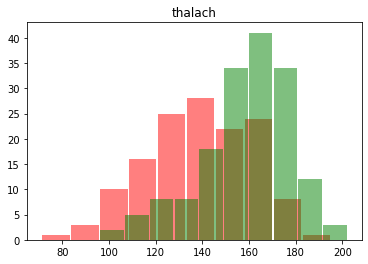

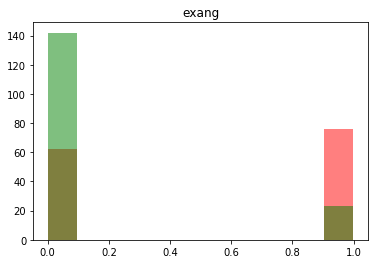

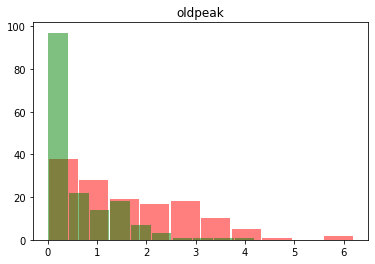

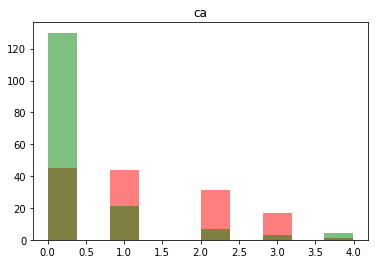

In [12]:
#thalach
pyplot.title("thalach")
thalach = plt.hist( data.loc[data['sick']>0].thalach.tolist(),rwidth= 0.95, color = ['r'],alpha = 0.5 ,histtype="barstacked", label="disease")
thalach = plt.hist( data.loc[data['sick']==0].thalach,rwidth= 0.95, color = ['g'],alpha = 0.5 ,histtype="barstacked", label= "No disease")
plt.show()


#exang
pyplot.title("exang")
exang = plt.hist( data.loc[data['sick']>0].exang.tolist(),rwidth= 0.95,alpha = 0.5 , color = ['r'],histtype="barstacked", label="disease")
exang = plt.hist( data.loc[data['sick']==0].exang,rwidth= 0.95, alpha = 0.5 ,color = ['g'],histtype="barstacked", label= "No disease")
plt.show()

#oldpeak
pyplot.title("oldpeak")
oldpeak = plt.hist( data.loc[data['sick']>0].oldpeak.tolist(),rwidth= 0.95,alpha = 0.5 , color = ['r'],histtype="barstacked", label="disease")
oldpeak = plt.hist( data.loc[data['sick']==0].oldpeak,rwidth= 0.95,alpha = 0.5 , color = ['g'],histtype="barstacked", label= "No disease")
plt.show()

#ca
pyplot.title("ca")
ca = plt.hist( data.loc[data['sick']>0].ca.tolist(),rwidth= 0.95,alpha = 0.5 , color = ['r'],histtype="barstacked", label="disease")
ca = plt.hist( data.loc[data['sick']==0].ca,rwidth= 0.95,alpha = 0.5 , color = ['g'],histtype="barstacked", label= "No disease")
plt.show()


### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

In [13]:
sick_check= data.groupby(['sick'])
sick_check.describe()

age                                                       sex  \
      count       mean       std   min   25%   50%   75%   max  count   
sick                                                                    
0     165.0  52.496970  9.550651  29.0  44.0  52.0  59.0  76.0  165.0   
1     138.0  56.601449  7.962082  35.0  52.0  58.0  62.0  77.0  138.0   

                ...   ca        thal                                          \
          mean  ...  75%  max  count      mean       std  min  25%  50%  75%   
sick            ...                                                            
0     0.563636  ...  0.0  4.0  165.0  2.121212  0.465752  0.0  2.0  2.0  2.0   
1     0.826087  ...  2.0  4.0  138.0  2.543478  0.684762  0.0  2.0  3.0  3.0   

           
      max  
sick       
0     3.0  
1     3.0  

[2 rows x 104 columns]

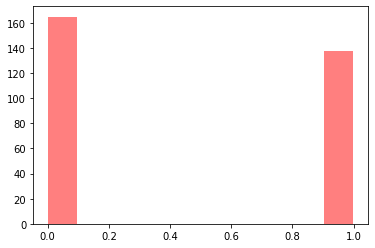

In [14]:
sick_checkgraph = plt.hist(data['sick'],rwidth= 0.95,alpha = 0.5 , color = ['r'],histtype="barstacked")

#housing.plot(kind="scatter", x="longitude", y="latitude")
#========================why cannot label x and y =======================

When we look at the number of the sick and not sick ratio it is like almost 50/50. So We can say that the data is balance

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

If our goal is Prediction, this will cause a definite bias. And worse, it will be a permanent bias, in the sense that we will not have consistent estimates as the sample size grows. Therefore, arguably the problem of (artificially) balanced data is worse than the unbalanced case.

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [15]:
corr_matrix = data.corr()
corr_matrix["sick"].sort_values(ascending=False)

sick        1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: sick, dtype: float64

In [16]:
# flights = sns.load_dataset("flights")
# >>> flights = flights.pivot("month", "year", "passengers")
# >>> ax = sns.heatmap(flights)

mask = np.zeros_like(corr_matrix)

tirangle_indicies = np.triu_indices_from(mask)
mask[tirangle_indicies] = True
mask


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

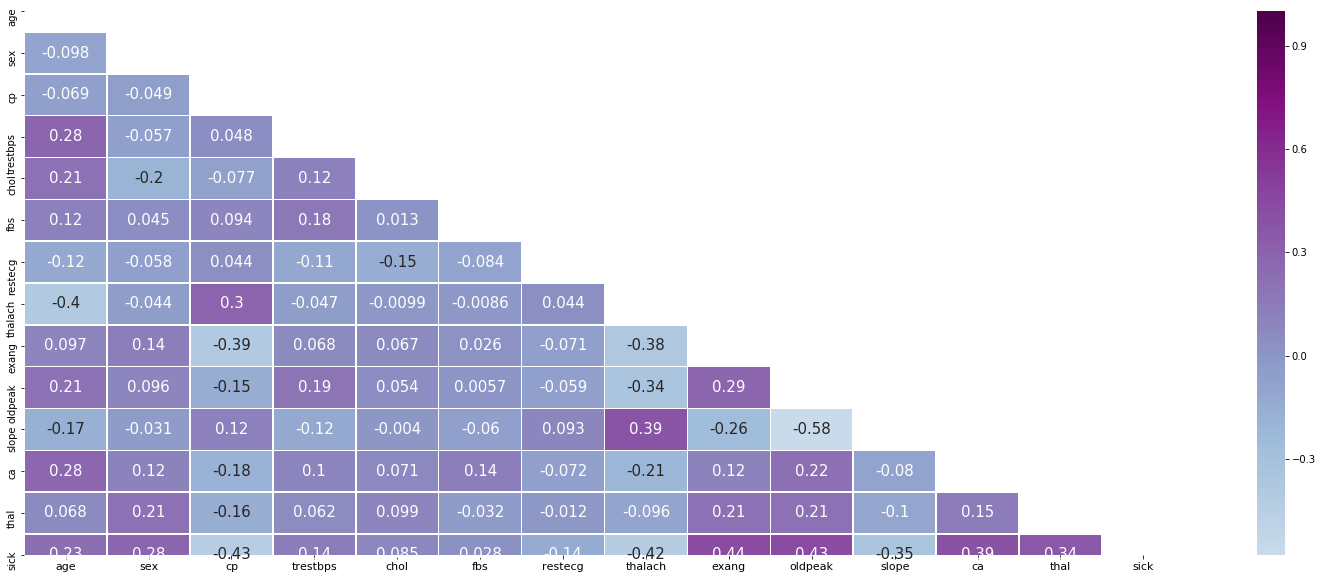

In [17]:
plt.figure(figsize= (26,10))
sns.heatmap(data.corr(), mask = mask,annot = True,cmap="BuPu",  linewidths=.5, center =0,annot_kws= {"size":15}) #second mask is from above
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 10)
plt.show()

'sick' and 'oldpeakST' are positively correlated. I think it is as the depression increase, the failure of heart also increase and it makes sense. Suprisingly, 'cp' and 'sick' is negativley correlated. Thus it means chest pain is nothing to do with sickness.

## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [18]:
y = data["sick"]
y.shape

(303,)

In [19]:
x = data.drop(["sick"], axis = 1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [22]:
print ("Training X",X_train.shape)
print ("Testing X",X_test.shape)
print ("Training Y",y_train.shape)
print ("Testing Y",y_test.shape)

Training X (212, 13)
Testing X (91, 13)
Training Y (212,)
Testing Y (91,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [23]:
def pipelining(x):
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer, make_column_transformer
    
    newdata = x.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal'], axis=1)
    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
    data_num_tr = num_pipeline.fit_transform(newdata) 
    numerical_features = list(newdata) 
    categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']


    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])
    newdata_prepared = full_pipeline.fit_transform(x)
    return newdata_prepared
    
    

In [24]:
toCompareX = X_train
toComparey = y_train


In [25]:

print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)

print("shape of y_test:", y_test.shape)



shape of X_train: (212, 13)
shape of X_test: (91, 13)
shape of y_train: (212,)
shape of y_test: (91,)


In [26]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.636792,0.650943,0.957547,131.801887,248.773585,0.136792,0.509434,148.929245,0.334906,1.082075,1.382075,0.759434,2.344340
std,9.056702,0.477800,1.036349,17.679838,49.731942,0.344441,0.528707,22.583593,0.473075,1.168082,0.615949,1.018155,0.558702
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,245.500000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,277.250000,0.000000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [27]:
X_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,53.736264,0.758242,0.989011,131.208791,240.417582,0.175824,0.571429,151.318681,0.307692,0.940659,1.439560,0.659341,2.241758
std,9.160101,0.430521,1.027343,17.293233,56.272762,0.382780,0.519462,23.679752,0.464095,1.144841,0.618399,1.035157,0.720195
min,29.000000,0.000000,0.000000,100.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,205.500000,0.000000,0.000000,141.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,232.000000,0.000000,1.000000,154.000000,0.000000,0.500000,2.000000,0.000000,2.000000
75%,60.500000,1.000000,2.000000,140.000000,262.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,70.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000


In [28]:
processed_data_x = pipelining(x)
x.shape

(303, 13)

In [29]:


X_train, X_test, y_train, y_test = train_test_split(processed_data_x, y, test_size=0.3)




print("shape of X_train:", X_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_test:", y_test.shape)



shape of X_train: (212, 30)
shape of y_train: (212,)
shape of X_test: (91, 30)
shape of y_test: (91,)


### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [30]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.3)

print ("New Training X",X_train_new.shape)
print ("New Testing X",X_test_new.shape)
print ("New Training Y",y_train_new.shape)
print ("New Testing Y",y_test_new.shape)

print('\n')


New Training X (212, 13)
New Testing X (91, 13)
New Training Y (212,)
New Testing Y (91,)




In [31]:
toCompareX.describe()  #X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.636792,0.650943,0.957547,131.801887,248.773585,0.136792,0.509434,148.929245,0.334906,1.082075,1.382075,0.759434,2.344340
std,9.056702,0.477800,1.036349,17.679838,49.731942,0.344441,0.528707,22.583593,0.473075,1.168082,0.615949,1.018155,0.558702
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,245.500000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,277.250000,0.000000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [32]:
X_train_new.describe() #Newly trained data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.099057,0.721698,0.919811,131.344340,245.155660,0.169811,0.504717,150.462264,0.349057,0.983019,1.419811,0.745283,2.306604
std,8.876968,0.449224,1.006229,17.048837,51.505941,0.376356,0.510530,23.048753,0.477800,1.094707,0.614350,1.026302,0.642384
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.750000,0.000000,0.000000,138.750000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,239.500000,0.000000,0.500000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,273.250000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000


[What differences are there between these two datasets?]


As we can see, two different training data set has difffernt value of 'mean' , 'std' and 'max'. So we can conclude that we created two different training data set.

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [33]:
#Raw data
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(x, y, test_size=0.3)

In [34]:
# SVM
from sklearn.svm import SVC

svm = SVC(probability = True, gamma = 'auto',C=4)
svm.fit(X_train_raw, y_train_raw)
predicted = svm.predict(X_test_raw)
score = svm.predict_proba(X_test_raw)
svm.score(X_test_raw, y_test_raw)

0.6043956043956044

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy:  0.6043956043956044
Precision:  0.6666666666666666
Recall:  0.05405405405405406
F1 Score:  0.1
Confusion Matrix


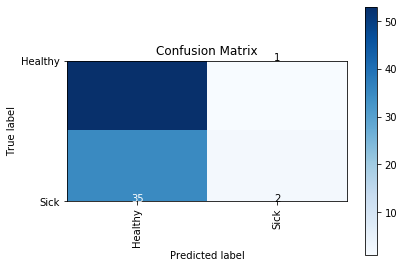

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print("Accuracy: ", accuracy_score(y_test_raw, predicted))
print("Precision: ", precision_score(y_test_raw, predicted))
print("Recall: ", recall_score(y_test_raw, predicted))
print("F1 Score: ", f1_score(y_test_raw, predicted))

print("Confusion Matrix")
draw_confusion_matrix(y_test_raw, predicted, ['Healthy','Sick'])




### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Accuracy: the fraction of prediction our model got right, or number of correct predictions/ total number of prediction

Precision : explores what portion of positive identifications was actually correct and realates directly to false positive as higher precision score corresponds to a low rate of false positive

Recall: the ratio of correctly predicted positive observations to the all observations in actual class

F1 Score: the weighted average of precision and recall and therefore takes both false  positives and false negatives into account

Confusion Matrix:shows the magnitude errors and precise composition of those errors



### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

SVM Model Performance Reesult: 



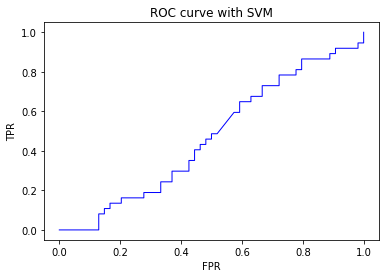

In [36]:
print("SVM Model Performance Reesult: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test_raw, score[:,1], pos_label =1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color ='blue', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()





ROC (Receiver Operating Characteristics) 

ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve.  It tells how much model is capable of distinguishing between classes.

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [37]:

svm = SVC(probability = True, gamma = 'auto',C=4)
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)
score = svm.predict_proba(X_test)

svm.score(X_test, y_test)

0.8571428571428571

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

Accuracy:  0.8571428571428571
Precision:  0.9393939393939394
Recall:  0.7380952380952381
F1 Score:  0.8266666666666667
Confusion Matrix


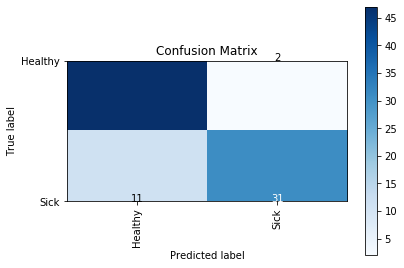

In [38]:
print("Accuracy: ", accuracy_score(y_test, predicted))
print("Precision: ", precision_score(y_test, predicted))
print("Recall: ", recall_score(y_test, predicted))
print("F1 Score: ", f1_score(y_test, predicted))

print("Confusion Matrix")
draw_confusion_matrix(y_test, predicted, ['Healthy','Sick'])



SVM Model Performance Reesult: 



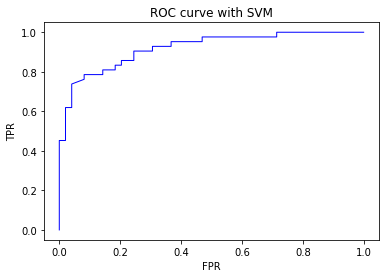

In [39]:
print("SVM Model Performance Reesult: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:,1], pos_label =1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color ='blue', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()




### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 



Raw data consist of a lot of categorical feature written in number which create confusion for the alogrithm during traning. But processed data On-hot-encode all categorical features so that categorical feature will not be treated as numeric values.

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [40]:
# # SVM

svm = SVC(probability = True, gamma = 'auto',C=4, kernel = 'linear')
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)

score = svm.predict_proba(X_test)
svm.score(X_test, y_test)

0.8571428571428571

Accuracy:  0.8571428571428571
Precision:  0.9142857142857143
Recall:  0.7619047619047619
F1 Score:  0.8311688311688312
Confusion Matrix


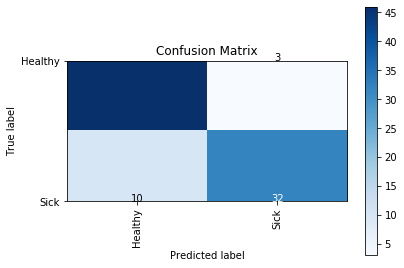

In [41]:
print("Accuracy: ", accuracy_score(y_test, predicted))
print("Precision: ", precision_score(y_test, predicted))
print("Recall: ", recall_score(y_test, predicted))
print("F1 Score: ", f1_score(y_test, predicted))

print("Confusion Matrix")
draw_confusion_matrix(y_test, predicted, ['Healthy','Sick'])



SVM Model Performance Reesult: 



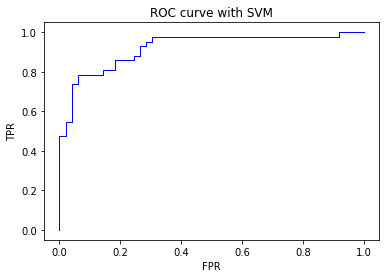

In [42]:
print("SVM Model Performance Reesult: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:,1], pos_label =1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color ='blue', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()




### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The result are the same. By specifying kernel= 'linear', it forces the model to seperate the data or cluster the result with a single straight line. Basically, it force the data to separte linearly even though it is not linearly seperatable. Therefore, if it the data is not linearly seperatable data, it will give a very low result of the accuracy. 

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter= 10, solver= 'sag', random_state=0)
classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)

classifier.score(X_test,y_test)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8571428571428571

Accuracy:  0.8571428571428571
Precision:  0.9142857142857143
Recall:  0.7619047619047619
F1 Score:  0.8311688311688312
Confusion Matrix


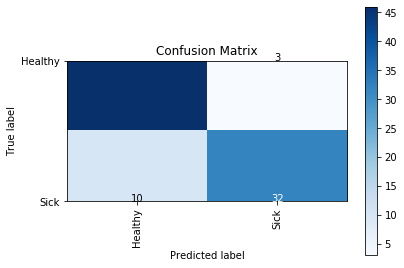

In [44]:
print("Accuracy: ", accuracy_score(y_test, predicted))
print("Precision: ", precision_score(y_test, predicted))
print("Recall: ", recall_score(y_test, predicted))
print("F1 Score: ", f1_score(y_test, predicted))

print("Confusion Matrix")
draw_confusion_matrix(y_test, predicted, ['Healthy','Sick'])




### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [45]:
# Logistic Regression
classifier = LogisticRegression(max_iter = 200, solver= 'sag', random_state=0)
classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)

classifier.score(X_test,y_test)



0.8571428571428571

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

"ConvergenceWarning: The max_iter was reached which means the coef_ did not converge" This mean Logistic Regression does not converge after 10 iteration. Therefore, by removing "max_iter= 10" from the parameter (setting it to default(100 iteration)), it increase the number of iteration and fixs the problem.


### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

In [46]:
# Logistic Regression
classifier = LogisticRegression(max_iter= 10000, solver= 'sag', random_state=0, penalty ='none')
classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)

classifier.score(X_test,y_test)



0.8241758241758241

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 



solver = Algorithm to use in the optimization problem.
penalty =Used to specify the norm used in the penalization.

If we use solver = sag and penalty = none, it would solve the data faster and create no regularization. In our case regularization is not needed 

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

SVM try to maximize the margin between the closest support vectors while LR the posterior class probability. Thus, SVM find a solution which is as fare as possible for the two categories while LR has not this property.



### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [47]:
# k-Nearest Neighbors algorithm

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

testing_result = knn.predict(X_test)
predicted = knn.predict(X_test)

knn.score(X_test,y_test)



0.8571428571428571

### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [48]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score

print("Homogeneity Score: ", homogeneity_score(y_test, predicted))
print("Adjusted Mutual Score: ", adjusted_mutual_info_score(y_test, predicted))
print("Adjusted Rand Score: ", adjusted_rand_score(y_test, predicted))
print("V Measure Score: ", v_measure_score(y_test, predicted))
print("Completeness: ", completeness_score(y_test, predicted))






Homogeneity Score:  0.410823601779012
Adjusted Mutual Score:  0.4060106174187316
Adjusted Rand Score:  0.504823296069239
V Measure Score:  0.4152125468631929
Completeness:  0.4196962812997808


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

Homogeneity Score = useful to check whether the clustering algorithm meets an important requirement: a cluster should contain only samples belonging to a single class. It's defined as: It's bounded between 0 and 1, with low values indicating a low homogeneity.
Mutual Information = It is use for comparing clustering. It corrects the effect of agreement solely due to chance between clustering.
Adjusted Rand Score = a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings
V-measure = The V-measure is the harmonic mean between homogeneity and completeness
Completeness score = The score of all members of a given class are assigned to the same cluster.

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [49]:
for i in [1,2,3,5,10,20,50,100]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    testing_result = knn.predict(X_test)
    predicted = knn.predict(X_test)
    score = knn.score(X_test,y_test)
    print("neighbors cunt = ", i , ": ", score)



    

neighbors cunt =  1 :  0.7802197802197802
neighbors cunt =  2 :  0.8351648351648352
neighbors cunt =  3 :  0.8021978021978022
neighbors cunt =  5 :  0.8571428571428571
neighbors cunt =  10 :  0.7912087912087912
neighbors cunt =  20 :  0.8131868131868132
neighbors cunt =  50 :  0.8131868131868132
neighbors cunt =  100 :  0.7802197802197802


### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

SVM tries to find the widest possible separating margin, while Logistic Regression optimizes the log likelihood function, with probabilities modeled by the sigmoid function. SVM extends by using kernel tricks, transforming datasets into rich features space, so that complex problems can be still dealt with in the same “linear” fashion in the lifted hyper space.
Logistic loss diverges faster than hinge loss. So, in general, it will be more sensitive to outliers.
Logistic loss does not go to zero even if the point is classified sufficiently confidently. This might lead to minor degradation in accuracy

